<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/Logo.png?alt=media&token=06318ee3-d7a0-44a0-97ae-2c95f110e3ac" width="100" height="100" align="right"/>

## 6 Recurrent Neural Networks in TensorFlow

## 6.1 Introduction


### <font color='Orange'> Recurrent Neural Networks </font>

> <font size="3">**<span style="color:#4285F4">Recurrent neural networks</span> are a class of <span style="color:#4285F4">neural networks</span> that is particularly useful for modeling <span style="color:#4285F4">sequence data</span> such as time series or natural language.**</font>

> <font size="3">**Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, <span style="color:#4285F4">the model considers not just the current input, but what it remembers about the preceding elements</span>.**</font>

> <font size="3">**Schematically, a recurrent neural network layer uses a <span style="color:#4285F4">for loop</span> to iterate over the timesteps of a sequence, while maintaining an <span style="color:#4285F4">internal state</span> that encodes information about the timesteps it has seen so far.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN1.png?alt=media&token=58f017a0-c2b7-4e18-afbc-948964f7bd8f" width="600" align="center"/>

### <font color='Orange'> Why Recurrent Neural Networks? </font>

### <font color='#34A853'> Outputs have no relationship </font>

<font size="3">**Let's say we have trained a <span style="color:#4285F4">neural network</span> to <span style="color:#4285F4">classify images</span> of various animals.**</font>

><font size="3">**For example, if we feed in an image of a dog at <span style="color:#4285F4">time = 0</span>, the network provides an output with a corresponding label - <span style="color:#4285F4">a dog</span>.**</font>
    
><font size="3">**After that, if we feed in an image of a cat at <span style="color:#4285F4">time = 1</span>, the network provides an output with a corresponding label - <span style="color:#4285F4">a cat</span>.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN2.png?alt=media&token=52273efe-f140-4fb9-a4f7-ad23689795f9" width="600" align="center"/>

<font size="3">**In this example, it is obvious that the first prediction will have <span style="color:#4285F4">no influence</span> on the second or future prediction. Hence, predicting a dog at <span style="color:#4285F4">time = 0</span>, <span style="color:#4285F4">would not help</span> in predicting a cat at <span style="color:#4285F4">time = 1</span>.**</font>
   
<font size="3">**In other words, ouptut at <span style="color:#4285F4">time = 0</span>, <span style="color:#4285F4">has no relation</span> with output at <span style="color:#4285F4">time = 1</span>.**</font>


### <font color='#34A853'> Outputs have relationship </font>

<font size="3">**Let's consider another example that current output has <span style="color:#4285F4">influence</span> on the future output.**</font>

<font size="3">**We have trained a <span style="color:#4285F4">neural network</span> to <span style="color:#4285F4">classify images</span> of weather types.**</font>

><font size="3">**For example, if we feed in an image of a cloudy condition at <span style="color:#4285F4">time = 0</span>, the network provides an output with a corresponding label - <span style="color:#4285F4">cloudy</span>.**</font>
    
><font size="3">**After that, if we feed in an image of a rainy condition at <span style="color:#4285F4">time = 1</span>, the network provides an output with a corresponding label - <span style="color:#4285F4">rain</span>.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN3.png?alt=media&token=4942dda0-9adf-44c5-b3ba-3f35c2880937" width="600" align="center"/>

<font size="3">**In this example, the first prediction will have <span style="color:#4285F4">influence</span> on the second or future prediction. Hence, predicting a cloudy condition at <span style="color:#4285F4">time = 0</span>, <span style="color:#4285F4">would help</span> in predicting a rainy condition at <span style="color:#4285F4">time = 1</span>.**</font>

<font size="3">**In other words, ouptut at <span style="color:#4285F4">time = 0</span>, <span style="color:#4285F4">has relation</span> with output at <span style="color:#4285F4">time = 1</span>.**</font>

### <font color='#34A853'>Recurrent neural network overcomes the challenge</font>

><font size="3">**With a <span style="color:#4285F4">feed-forward neural network</span>, output at <span style="color:#4285F4">time t</span>, <span style="color:#4285F4">has no relation</span> with output at <span style="color:#4285F4">time = t-1</span>.**</font>

><font size="3">**With <span style="color:#4285F4">recurrent neural network</span>, this challenge can be overcome because output at <span style="color:#4285F4">time t</span> is fed back into the network. Therefore, output at <span style="color:#4285F4">time t</span>, <span style="color:#4285F4">has relation</span> with output at <span style="color:#4285F4">time = t-1</span>.**</font>



<font size="3">**Let's consider a <span style="color:#4285F4">recurrent neural network</span> in an <span style="color:#4285F4">unrolled</span> form.**</font><br>

<font size="3">**To unroll a recurrent neural network, we can think of as multiple copies of the same network, each passing its internal states to a successor. And this makes the data flow of the hidden states, the inputs, the outputs and the weights clearer.**</font><br>

<font size="3">**This <span style="color:#4285F4">chain-like nature</span> reveals that <span style="color:#4285F4">recurrent neural networks</span> are literally related to <span style="color:#4285F4">sequences</span>.**</font><br>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN4.png?alt=media&token=0ca1ef5b-acc0-4412-8292-56efe510f5ef" width="900" align="center"/>

<font size="3">**In this case, we have an input x<sub>0</sub> at <span style="color:#4285F4">time t=0</span> which is fed into the recurrent neural network. The network generates a corresponding output h<sub>0</sub>.**</font><br>

<font size="3">**At the next timestamp <span style="color:#4285F4">time t=1</span>, previous output h<sub>0</sub> is fed into the network along with the input x<sub>1</sub>. The network generates a corresonding output h<sub>1</sub>.**</font><br>

<font size="3">**This process repeats to ensure that the network can use <span style="color:#4285F4">previous outputs along with latest inputs for prediction</span>.**</font><br>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN5.png?alt=media&token=dd188e0b-73a7-425d-b57e-1556f737ca5c" width="700" align="center"/>

## 6.2 Recurrent Neural Networks - Mathematical Representations

### <font color='#34A853'>Forward Propagation</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN6.png?alt=media&token=ff9937d6-a809-4d81-9a7f-8a5e116ecd50" width="1200" align="center"/>

<font size="3">**At time step 1,**</font>

><font size="3">**the recurrent neural network uses input value <span style="color:#4285F4">x<sub>1</sub></span> and activation value <span style="color:#4285F4">a<sub>0</sub></span> to predict output value <span style="color:#4285F4">y<sub>1</sub></span>**</font>

><font size="3">**the parameters used for each time step are shared:**</font> 
>><font size="3">**<span style="color:#9933FF">W<sub>ax</sub></span> are the parameters governing the input connection from input value <span style="color:#4285F4">x<sub>1</sub></span> to hidden layer**</font><br>
>><font size="3"></font><br>
>><font size="3">**<span style="color:red">W<sub>aa</sub></span> are the parameters governing the horizontal connection from activation value <span style="color:#4285F4">a<sub>0</sub></span> to hidden layer**</font><br>
>><font size="3"></font><br>
>><font size="3">**<span style="color:#00B0F0">W<sub>ya</sub></span> are the parameters governing the output connection from activation value <span style="color:#4285F4">a<sub>1</sub></span> to output value <span style="color:#4285F4">y<sub>1</sub></span>**</font>

><font size="3">**the activation function in the hidden layer <span style="color:#4285F4">g<sub>a</sub></span> used to compute activation value <span style="color:#4285F4">a<sub>1</sub></span> will often be a <span style="color:#4285F4">tanh</span>.**</font>

><font size="3">**the activation function in the output layer <span style="color:#4285F4">g<sub>y</sub></span> used to compute output value <span style="color:#4285F4">y<sub>1</sub></span> will depend on what your output is.**</font>

<font size="3">**More generally, at time step t,**</font>

><font size="3">**the recurrent neural network uses input value <span style="color:#4285F4">x<sub>t</sub></span> and activation value <span style="color:#4285F4">a<sub>t-1</sub></span> to predict output value <span style="color:#4285F4">y<sub>t</sub></span>**</font>

<font size="3">**So, these equations define the forward propagation in the recurrent neural network.**</font> 

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font>
<font size="3">**One weakness of this recurrent neural network is that it only uses the information that is earlier in the sequence to make a prediction. In that case, bi-directional recurrent neural network can be used to address the problem.**</font>

<font size="3">**Sometimes, it is defined in a slightly simpler way to combine parameter <span style="color:red">W<sub>aa</sub></span> and <span style="color:#9933FF">W<sub>ax</sub></span> together to form <span style="color:#00CC66">W<sub>a</sub></span>.**</font>
    
><font size="3">**The advantage of this notation is that rather than carrying two parameter matrices, we can compress them into one parameter matrix, which simplifies the notation especially for more complex models.**</font>

<font size="3">**Similarly, we can change the parameter <span style="color:red">W<sub>ya</sub></span> to <span style="color:#0000FF">W<sub>y</sub></span>.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN7.png?alt=media&token=ade1c226-6d6c-4c08-83a5-42e0cda35277" width="330" align="center"/>

### <font color='#34A853'>Backpropagation Through Time</font>

<font size="3">**In order to compute backpropagation, a loss function is needed. Let's define an element-wise loss with the use of cross-entropy loss at single time t.**</font>

<font size="3">**For each time step t, we calculate the loss:**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN8.png?alt=media&token=ff62a679-ead5-4da7-b092-fd13e70144b7" width="470" align="center"/>

<font size="3">**Finally, we can sum all the loss to an overall loss for the entire sequence**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN9.png?alt=media&token=7c55d9fb-e2bb-44c1-a037-0cd5b4b5514e" width="470" align="center"/>

<font size="3">**Obviously, we can just compute the full sum. However, this is very slow and gradients can blow up, since subtle changes in the initial conditions can potentially affect the outcome a lot. Hence this strategy is almost never used in practice.**</font>

<font size="3">**Alternatively, we can truncate the sum at a certain number of steps. This leads to an approximation of the true gradient. In practice this works quite well. It is what is commonly referred to as <span style="color:#4285F4">truncated backpropgation through time</span>. One of the consequences of this is that the model focuses primarily on short-term influence rather than long-term consequences. This is actually desirable, since it biases the estimate towards simpler and more stable models.**</font>

Reference: https://d2l.ai/chapter_recurrent-neural-networks/bptt.html

## 6.3 Build your first Recurrent Neural Network

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/1Keras.png?alt=media&token=9f4add09-14d3-49ed-bc11-f0497f6e96f1" width="200" height="200" align="right"/>

<font size="3">**The Keras recurrent neural network API is designed with a focus on:**</font>

> <font size="3">**<span style="color:#4285F4">Ease of use</span>: the built-in <span style="background-color: #ECECEC; color:#0047bb">keras.layers.RNN</span>, <span style="background-color: #ECECEC; color:#0047bb">keras.layers.LSTM</span>, <span style="background-color: #ECECEC; color:#0047bb">keras.layers.GRU</span> layers enable you to quickly build recurrent models without having to make difficult configuration choices.**</font>

> <font size="3">**<span style="color:#4285F4">Ease of customization</span>: You can also define your own recurrent neural network cell layer (the inner part of the for loop) with custom behavior, and use it with the generic <span style="background-color: #ECECEC; color:#0047bb">keras.layers.RNN</span> layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

### <font color='#34A853'>Import libraries</font>
<hr style="border:2px solid ##34A853"> </hr>

><font size="3">**Sequential model**</font> 

><font size="3">**Layers SimpleRNN** - for recurrent neural network</font>

><font size="3">**Layers Dense** - for image classification</font>

><font size="3">**Mnist dataset** - the dataset contains 60,000 training and 10,000 test handwritten digits in 10 classes</font>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

### <font color='#34A853'>Import images from CIFAR10 dataset</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples.**</font>

<font size="3">**The classes are completely mutually exclusive. Here are the classes in the dataset:**</font>


<table align="left">
    <tr>
        <td><b>Label</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>0</td>
        <td>Zero</td>
    </tr>
    <tr>
        <td>1</td>
        <td>One</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Two</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Three</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Four</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Five</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Six</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Seven</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Eight</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Nine</td>
    </tr>
</table>

Reference: http://yann.lecun.com/exdb/mnist/

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

### <font color='#34A853'>Preprocess the data - Normalization</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The images are stored in 28x28 numpy arrays, with pixel values ranging from 0 to 255. Therefore, value 255 is used to normalize pixel values to be between 0 and 1.**</font>   

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

<font size="3">**The labels are an array of integers, ranging from 0 to 9. Their corresponding class names can be stored in a list.**</font>   

In [4]:
class_names = ['Zero', 
               'One', 
               'Two', 
               'Three', 
               'Four',
               'Five', 
               'Six', 
               'Seven', 
               'Eight', 
               'Nine']

### <font color='#34A853'>Explore the data</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Shapes of training and test images**</font>

In [5]:
print("The shape of training images is:", train_images.shape)
print("The shape of training labels is:", train_labels.shape)

The shape of training images is: (60000, 28, 28)
The shape of training labels is: (60000,)


In [6]:
print("The shape of test images is:", test_images.shape)
print("The shape of test labels is:", test_labels.shape)

The shape of test images is: (10000, 28, 28)
The shape of test labels is: (10000,)


<font size="3">**Label values**</font>

In [7]:
print("The label values range from:", np.min(train_labels), "to" ,np.max(train_labels))

The label values range from: 0 to 9


<font size="3">**Pixel values**</font>

The pixel values range from: 0.0 to 1.0


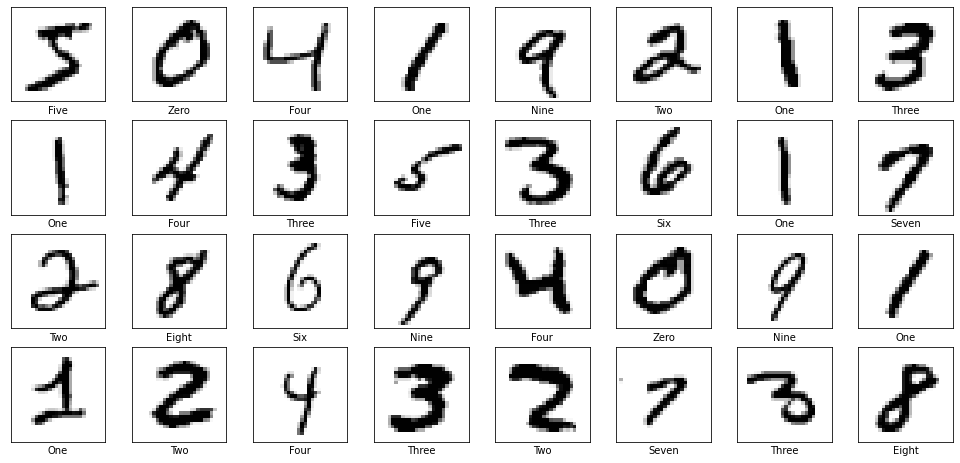

In [8]:
print("The pixel values range from:", np.min(train_images), "to" ,np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### <font color='#34A853'>Build the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Setup and configure a Sequential model*</font>

<font size="3">**<span style="color:#4285F4">1<sup>st</sup></span> and <span style="color:#4285F4">2<sup>nd</sup></span> layers:**</font>
> <font size="3">**The recurrent neural network consists of a sequence of one <span style="background-color: #ECECEC; color:#0047bb">tf.keras.layers.SimpleRNN</span> layer and one <span style="background-color: #ECECEC; color:#0047bb">tf.keras.layers.Dense</span> layer. These layers are densely connected or fully connected.**</font>

> <font size="3">**The 1<sup>st</sup> layer has 100 units.**</font>

> <font size="3">**The 2<sup>nd</sup> layer has 10 nodes (or neurons) which returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.**</font> 

In [10]:
model = Sequential()
model.add(SimpleRNN(100, input_shape=(28,28)))
model.add(Dense(10, activation ='softmax'))

<font size="3">**Here's the complete architecture:**</font><br>

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 13,910
Trainable params: 13,910
Non-trainable params: 0
_________________________________________________________________


### <font color='Orange'>*2) Compile the model*</font>

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

<font size="3">**<span style="color:#4285F4">SparseCategoricalCrossentropy</span> and <span style="color:#4285F4">CategoricalCrossentropy</span> both compute categorical cross-entropy. The only difference is in how the targets/labels should be encoded.**</font>

> <font size="3">**For <span style="color:#4285F4">one hot</span> representation, <span style="color:#4285F4">CatergoricalCrossentropy</span> can be used.**</font>

> <font size="3">**For labels as integers (i.e. 0, 1, 2), <span style="color:#4285F4">SparseCategoricalCrossentropy</span> can be used.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">from_logits</span> argument informs the loss function whether the output is expected to be a logits tensor (i.e. normalized).**</font>

><font size="3">**By default, <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">False </span> which assumes that output encodes a probability distribution, such as outputs from softmax and sigmoid activations.**</font>

><font size="3">**If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, this assumes that output is a logits. In this case, softmax or sigmoid activations will automatically applied on the output values by the loss function. Hence, output layer doesn't need any probabilistic activation function.**</font>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**Remark: If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, no activation function is needed in the output layer, e.g.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.png?alt=media&token=d053ce8a-8ccb-4087-a198-a19ced62e298" width="2000"/>

### <font color='#34A853'>Train the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Feed the model*</font>

In [13]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3933 - accuracy: 0.8824 - val_loss: 0.2169 - val_accuracy: 0.9394
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2124 - accuracy: 0.9392 - val_loss: 0.1804 - val_accuracy: 0.9481
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1820 - accuracy: 0.9490 - val_loss: 0.1782 - val_accuracy: 0.9510
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1653 - accuracy: 0.9539 - val_loss: 0.1247 - val_accuracy: 0.9654
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1484 - accuracy: 0.9587 - val_loss: 0.1635 - val_accuracy: 0.9537
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1404 - accuracy: 0.9608 - val_loss: 0.1647 - val_accuracy: 0.9535
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1382 - accuracy: 0.9617 - val_loss: 0.1265 - 

<font size="3">**To start training, <span style="background-color: #ECECEC; color:#0047bb">model.fit()</span> method can be used to "fit" the model with training data. In this example, the training data is in the <span style="color:#4285F4">train_images</span> and <span style="color:#4285F4">train_labels</span> arrays.**</font>

<font size="3">***Training accuracy***</font>
> <font size="3">**As the model trains, the loss and accuracy metrics are improving. After 10 epochs, this model reaches an accuracy of about 0.96 (96%) on training data.**</font><br>

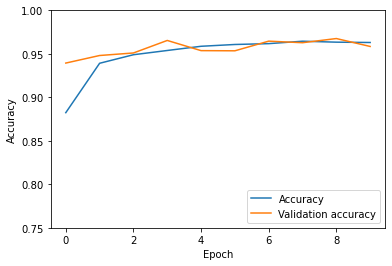

In [14]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 1s - loss: 0.1536 - accuracy: 0.9585
Test accuracy: 96 %


<font size="3">***Test accuracy***</font>
> <font size="3">**It turns out this recurrent neural network has achieved a test accuracy of around 94%. Not bad with such simple model!**</font>

### <font color='Orange'>*3) Verify and visualize predictions*</font>

<font size="3">**With trained network, it can be used to make predictions.**</font>
<font size="3">**Let's predict 16 images. Correct prediction labels are blue and incorrect prediction labels are red. The number indicates the precentage (i.e. confidence) for the predicted label.**</font>

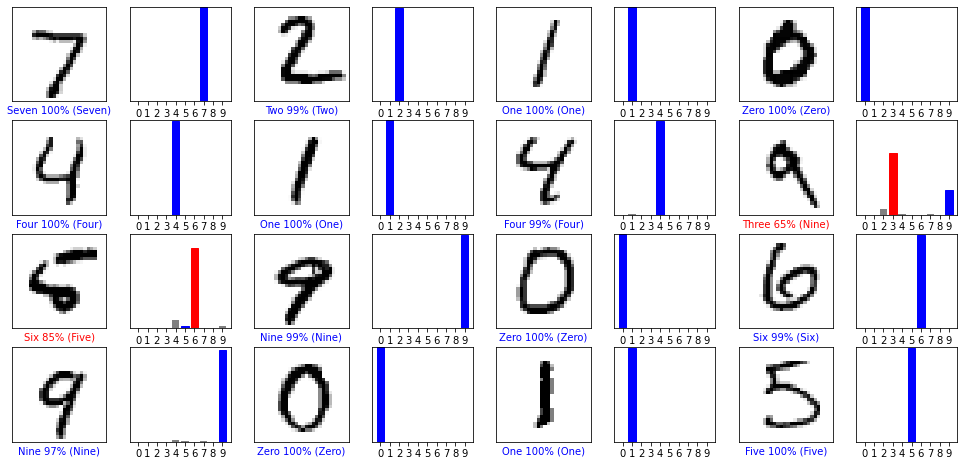

In [16]:
predictions = model.predict(test_images)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
    
plt.show()

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**The model can be wrong even when it has high confidence about its prediction.**</font>

<hr style="border:2px solid #E1F6FF"> </hr>

## 6.4 Vanishing and Exploding Gradients of Recurrent Neural Networks

<font size="3">**One of the problems with training recurrent neural networks, especially very deep networks, is the <span style="color:#4285F4">vanishing gradients</span> and <span style="color:#4285F4">exploding gradients</span>.**</font> 

<font size="3">**It is because the derivatives or slopes can sometimes be exponentially big or small, and this makes training difficult.**</font>

<font size="3">**Let's assume we have a very deep neural network**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN10.png?alt=media&token=dfd2275a-15c9-4685-bed4-536d188cf4d3" width="1000" align="center"/>

<font size="3">**For the sake of simplicity, we just assume:**</font> 

> <font size="3">**Each layer has only two hidden units.**</font><br>
> <font size="3"></font><br>
> <font size="3">**Each layer has linear activation function, i.e. <span style="color:#4285F4">g(z) = z</span>, where g is the linear activation function.**</font><br>
> <font size="3"></font><br>
> <font size="3">**Bias parameter b is ignored, i.e. <span style="color:#4285F4">b<sup>n</sup> = 0</span>**</font>
 

<font size="3">**In that case, we have the following output equation:**</font> 

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN11.png?alt=media&token=015dbda1-f054-4c4c-9191-7d7cdf1dbe4c" width="750" align="center"/>



<font size="3">**Technically, the last weight parameter <span style="color:#4285F4">W<sup>[n]</sup></span> is in different dimension.**</font>
    
<font size="3">**Now, let's say each of the weight matrices, except <span style="color:#4285F4">W<sup>[n]</sup></span>, is <span style="color:#4285F4">larger than</span> an identity matrix.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN12.png?alt=media&token=9b4b18ad-12d4-45ab-80fb-85c677e7d25d" width="410" align="center"/>

<font size="3">**The output equation will be:**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN13.png?alt=media&token=55ab350d-106f-4a89-863e-627cc0657dfc" width="215" align="center"/>

<font size="3">**Therefore, for a very deep network, <span style="color:#4285F4">n → a very large number</span>, output as well as gradient <span style="color:#4285F4">explode</span>.**</font>

<font size="3">**Conversely, let's say each of the weight matrices, except <span style="color:#4285F4">W<sup>[n]</sup></span>, is <span style="color:#4285F4">less than</span> an identity matrix.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN14.png?alt=media&token=1aa0f7ee-a4d0-41b5-8e73-42b709cfba5a" width="410" align="center"/>

<font size="3">**The output equation will be:**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN15.png?alt=media&token=7975eee2-b074-4955-a7fe-ae5ecf5cd885" width="215" align="center"/>

<font size="3">**Therefore, for a very deep network, <span style="color:#4285F4">n → a very large number</span>, output as well as gradient <span style="color:#4285F4">vanish</span>.**</font>



<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**For the vanishing gradient problem, the deeper the network, the lower the value of gradient is and the harder it is to train the weights, which is often the main issue to using recurrent neural networks.**</font>

## 6.5 Solutions to Vanishing and Exploding Gradients of Recurrent Neural Networks

<font size="3">**For <span style="color:#4285F4">exploding gradient</span>, the following methods can be used:**</font><br>

> <font size="3">**<span style="color:#4285F4">Truncated backpropagation</span>** - stop backpropagating after a certain time</font><br>
> <font size="3"><br>
> <font size="3">**<span style="color:#4285F4">Penalties</span>** - penalize or artificially reduce gradient</font><br>
> <font size="3"><br>
> <font size="3">**<span style="color:#4285F4">Gradient clipping</span>** - put a maximum limit on a gradient</font><br>

<font size="3">**For <span style="color:#4285F4">vanishing gradient</span>, the following methods can be used:**</font><br>
    
> <font size="3">**<span style="color:#4285F4">Weight initialization</span>** - artificially initialize weights so that the potential for vanishing gradient is minimized</font><br>
> <font size="3"><br>
> <font size="3">**<span style="color:#4285F4">Echo State Networks</span>** - Details can be found [HERE](http://www.scholarpedia.org/article/Echo_state_network).</font><br>
> <font size="3"><br>
> <font size="3">**<span style="color:#4285F4">Long Short-Term Memory (LSTM) Networks</span>**</font><br>
    
References:<br>
https://nickmccullum.com/python-deep-learning/vanishing-gradient-problem/<br>
https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-the-vanishing-gradient-problem   

## 6.6 Long Short-Term Memory (LSTM) Networks

### <font color='Orange'>Introduction</font>

<font size="3">**Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of recurrent neural networks, capable of learning long-term dependencies. LSTMs are explicitly designed to**</font>
    
><font size="3">**<span style="color:#4285F4">capture long-term connections</span>**</font>

><font size="3">**<span style="color:#4285F4">help avoid the vanishing gradient problems</span>**</font> 

<font size="3">**Rather than dealing the gradient issues directly, the architectures of recurrent neural networks are modified to have a better gradient flow properties.**</font><br>

<font size="3">**All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard recurrent neural networks, this repeating module will have a very simple structure, such as a <span style="color:#4285F4">single tanh layer</span>.**</font><br>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN16.png?alt=media&token=26710ffc-f7ef-4f05-997e-720ab3c395d5" width="800" align="center"/>



<font size="3">**LSTMs have similar chain like structure. However, instead of having a <span style="color:#4285F4">single tanh layer</span>, there are four interacting layers.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN17.png?alt=media&token=cc9fd94a-42c2-4ee5-a325-3200680f5f56" width="800" align="center"/>


### <font color='Orange'>Core Concept of LSTMs</font>

<font size="3">**LSTMs have two types of memory:**</font>
    
<font size="3">**1. Cell state <span style="color:#4285F4">c<sub>t</sub></span>**</font>
><font size="3">**This is a long-term memory to capture the long-term information.**</font>
><font size="3"></font><br>
><font size="3">**The cell state <span style="color:#4285F4">c<sub>t</sub></span> is like a conveyor belt and information is allowed to flow through the entire chain, with only some minor linear interactions. As a result, information is easily flowing along it without changing at all.**</font>

<font size="3">**2. Hidden state <span style="color:#4285F4">h<sub>t</sub></span>**</font>
><font size="3">**This is a shot-term memory to capture the short-term information.**</font>
><font size="3"></font><br>
><font size="3">**Unlike cell state <span style="color:#4285F4">c<sub>t</sub></span>, the hidden state <span style="color:#4285F4">h<sub>t</sub></span> has much more non-linear interactions. Information is relatively hard to flow along it. As a result, information can be kept in short-term.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN18.png?alt=media&token=d9702d31-edd7-4eee-bc23-70388832bf6d" width="650" align="center"/>

<font size="3">**Apart from capturing long-term information and short-term information with the use of cell state <span style="color:#4285F4">c<sub>t</sub></span> and hidden state <span style="color:#4285F4">h<sub>t</sub></span> respectively, LSTM also have the ability to remove or add information, regulated by structures call <span style="color:#4285F4">gates</span>.**</font>

<font size="3">**<span style="color:#4285F4">Gates</span> are a way to select information. They are composed out of**</font> 
><font size="3">**<span style="color:#4285F4">a sigmoid neural net layer</span>**</font>

><font size="3">**<span style="color:#4285F4">a pointwise multiplication operation</span>**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN19.png?alt=media&token=c87c7dcc-db36-4989-bdee-079bc082891a" width="100" align="center"/>

<font size="3">**The sigmoid layer outputs numbers <span style="color:#4285F4">between zero and one</span>, describing how much of each component should be let through.**</font>
    
><font size="3">**Zero - means no infomration is flowing through**</font>
    
><font size="3">**One - means all information is flowing through**</font>

### <font color='Orange'>How LSTMs work?</font>

<font size="3">**An LSTM has three of gates to protect and control the cell state <span style="color:#4285F4">c<sub>t</sub></span> and hidden state <span style="color:#4285F4">h<sub>t</sub></span>.**</font>

<font size="3">**1. Long-term Memory - Forget Gate Layer**</font>

<font size="3">**The first step in LSTM is to decide what information is needed to be forgotten from the cell state. This decision is made by a sigmoid layer called the <span style="color:#4285F4">forget gate layer</span>.**</font>
    
<font size="3">**This <span style="color:#4285F4">forget gate layer</span> takes <span style="color:#4285F4">h<sub>t−1</sub></span> and <span style="color:#4285F4">x<sub>t</sub></span> as inputs, and outputs a number between 0 and 1 for each number in the cell state <span style="color:#4285F4">C<sub>t−1</sub></span>.**</font>
    
><font size="3">**Zero - means all infomration is forgotten**</font>
    
><font size="3">**One - means all information is kept**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN20.png?alt=media&token=2c1b2d1a-8d3d-4fe5-bd84-7f95acb9415d" align="center"/>

<font size="3">**2. Long-term Memory - Input Gate Layer**</font>

<font size="3">**The next step is to decide what new information is needed to be stored in the cell state.**</font>
    
<font size="3">**This involves two calculations:**</font>
    
><font size="3">**First, a sigmoid <span style="color:#4285F4">input gate layer</span> decides which values are needed to be updated.**</font>
    
><font size="3">**Then, a <span style="color:#4285F4">tanh layer</span> creates a vector of new candidate values, <span style="color:#4285F4">g<sub>t</sub></span>, that could be added to the values updated in previous step.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN21.png?alt=media&token=428059b6-b5c1-4692-98eb-515f9ea631cd" align="center"/>

<font size="3">**3. Long-term Memory - Forget Gate Layer + Input Gate Layer**</font>

<font size="3">**Combining 1. what information has been forgotten and 2. what information has been stored, an update to the state can be created.**</font>

<font size="3">**The old cell state <span style="color:#4285F4">c<sub>t−1</sub></span> is updated into new cell state <span style="color:#4285F4">c<sub>t</sub></span>.**</font>

><font size="3">**The old cell state <span style="color:#4285F4">c<sub>t−1</sub></span> is multiplied by <span style="color:#4285F4">f<sub>t</sub></span> based on what is decided to forget.**</font>
    
><font size="3">**Then a scaled new candidate values <span style="color:#4285F4">i<sub>t</sub>*g<sub>t</sub></span> is added based on what is decided to update.**</font> 
    
<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN22.png?alt=media&token=771d2915-d94b-4265-9fe7-811bafad882c" align="center"/>

<font size="3">**4. Short-term Memory - Output Gate Layer**</font>

<font size="3">**The final step is to decide what is going to output. This output will be based on:**</font>

><font size="3">**New cell state <span style="color:#4285F4">c<sub>t</sub></span> which captures the long-term information**</font>

><font size="3">**Previous hidden state <span style="color:#4285F4">h<sub>t−1</sub></span> which captures the short-term information**</font>

><font size="3">**Current input <span style="color:#4285F4">x<sub>t</sub></span>**</font>

<font size="3">**This involves two calculations:**</font>
    
><font size="3">**Firstly, a sigmoid <span style="color:#4285F4">output gate layer</span> is used to decides what information is going to output.**</font> 

><font size="3">**Then new cell state <span style="color:#4285F4">c<sub>t</sub></span> will go through a <span style="color:#4285F4">tanh</span> which is used to control the values to be between -1 and 1. This cell state will then be multiplied by the output of the sigmoid <span style="color:#4285F4">output gate layer</span>, so that we only output the parts we decided to.**</font>
   
<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN23.png?alt=media&token=30304c9d-0e9b-4340-b55c-b832bd85f5a9" align="center"/>

### <font color='Orange'>Summary</font>

<font size="3">**To summarize, LSTM takes previous hidden state and current input, stack them and then multiply by a weight matrix w, to compute four different gates.**</font> 

><font size="3">**<span style="color:#4285F4">Forget gate</span> is used to determine how much we want to forget the cell memory from previous time step.**</font> 

><font size="3">**<span style="color:#4285F4">Input gate</span> is used to determine how much we want to update our cell.**</font>

><font size="3">**And then we have a gate to <span style="color:#4285F4">combine the forget gate and input gate</span> to determine how much we want to update our cell states.**</font> 

><font size="3">**<span style="color:#4285F4">Output gate</span> is used to determine how much we want to reveal ourself to the outside world.**</font> 

<font size="3">**In short, the forget gate and input gate are used in the updating of the internal state. The output gate is a final limiter to determine what the cell actually outputs. And these gates and the consistent data flow keep each cell stable, neither exploding or vanishing.**</font>  

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN24.png?alt=media&token=57848d33-614e-4fb3-af66-05de3d301580" align="center"/>



<font size="3">**We can combine all of the steps and the four gates to form a big matrix to have a mathematical representations.**</font>  

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN25.png?alt=media&token=1f96452e-2342-4ed7-999a-9b18210eac75" align="center"/>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font>
<font size="3">**A brief comparison**</font>

<font size="3">**Unlike vanilla recurrent neural network which has a single hidden state <span style="color:#4285F4">h<sub>t</sub></span>, a LSTM maintains two hidden states at every time step.**</font> 

><font size="3">**One is the hidden state <span style="color:#4285F4">h<sub>t</sub></span> which is similar to recurrent neural network, although they are not the same.**</font> 
    
><font size="3">**The other is the cell state <span style="color:#4285F4">c<sub>t</sub></span>**</font> 

><font size="3">**Because of this cell state and the four gates, LSTM has the ability to alleviate the long-term dependency problem and make it better perform in a particular long sequence and time-series problems.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN26.png?alt=media&token=ab98d720-c0f9-4c32-a6c4-c597d8da904b" width="950" align="center"/>